# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading Training Dataset

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Uploading Test Dataset

In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Training Data

##Correaltion Between Features

In [6]:
corr = train_data.corr()

corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Information About the Training Dataset

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Unique Values in the Training Dataset

In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Checking for missing Values in Training Data

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling Missing Values in Training Data

In [10]:
#creating a flag variable for Cabin
train_data['Cabin_ind'] = 1
train_data['Cabin_ind'][train_data['Cabin'].isna()] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
train_data['Cabin_ind'].value_counts()

0    687
1    204
Name: Cabin_ind, dtype: int64

In [12]:
train_data.drop('Cabin',axis = 1,inplace = True)

In [13]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age']).median()

In [14]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked']).mode()[0]

In [15]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_ind      0
dtype: int64

## Checking for Outliers in Training Data

### Target variable

0    549
1    342
Name: Survived, dtype: int64

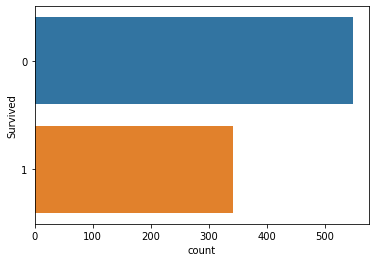

In [16]:
sns.countplot(y = 'Survived', data = train_data)
train_data['Survived'].value_counts()


### Passenger_Id

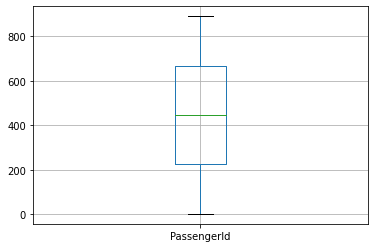

In [17]:
train_data.boxplot(column = 'PassengerId')

### Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

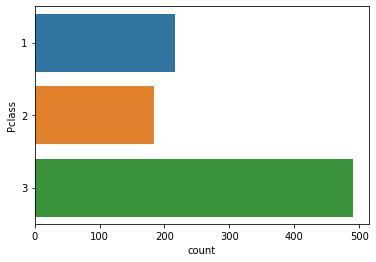

In [18]:
sns.countplot(y = 'Pclass', data = train_data)
train_data['Pclass'].value_counts()

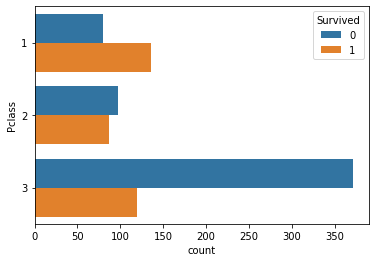

In [19]:
# Survival rate of each Pclass
sns.countplot(y='Pclass',hue='Survived',data=train_data)

### Sex

1    577
0    314
Name: Sex, dtype: int64

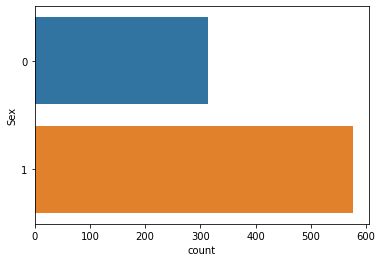

In [20]:
# Label Encoding Sex Feature because it has Categorical values
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0}).astype(int)
sns.countplot(y = 'Sex', data = train_data)
train_data['Sex'].value_counts()

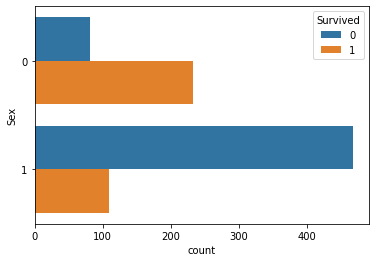

In [21]:
# Survival rate of Both gender
sns.countplot(y='Sex',hue='Survived',data=train_data)

### SibSp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

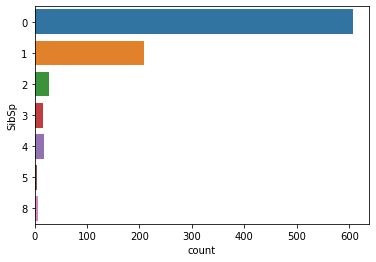

In [22]:
sns.countplot(y = 'SibSp', data = train_data)
train_data['SibSp'].value_counts()

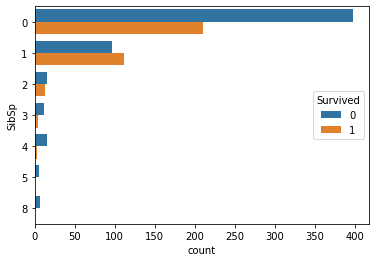

In [23]:
sns.countplot(y = 'SibSp',hue = 'Survived', data = train_data)

### Parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

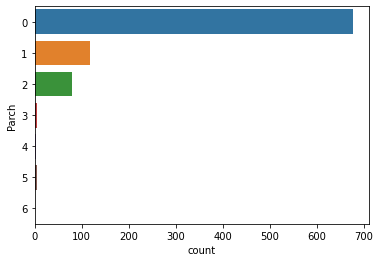

In [24]:
sns.countplot(y = 'Parch', data = train_data)
train_data['Parch'].value_counts()

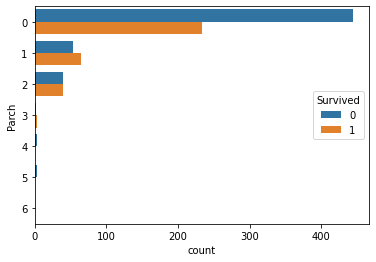

In [25]:
sns.countplot(y = 'Parch',hue = 'Survived', data = train_data)

### Fare

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


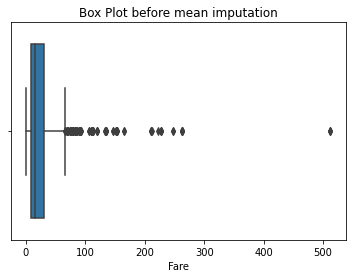

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


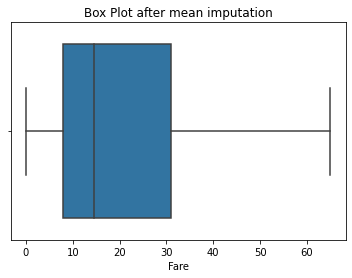

In [26]:
sns.boxplot(train_data['Fare'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = train_data['Fare'].quantile(0.25)
q3 = train_data['Fare'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(train_data['Fare'])
for i in train_data['Fare']:
    if i > Upper_tail or i < Lower_tail:
            train_data['Fare'] = train_data['Fare'].replace(i, m)
sns.boxplot(train_data['Fare'])
plt.title("Box Plot after mean imputation")
plt.show()   

In [27]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",1,28.0,1,0,A/5 21171,7.250000,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,28.0,1,0,PC 17599,32.204208,S,1
2,3,1,3,"Heikkinen, Miss. Laina",0,28.0,0,0,STON/O2. 3101282,7.925000,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,28.0,1,0,113803,53.100000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,28.0,0,0,373450,8.050000,S,0


In [28]:
# From above Exploration of Training Dataset Features 
# Removing the unnecessary Columns
train_data.drop('PassengerId', axis = 1, inplace = True)
train_data.drop('Name', axis = 1, inplace = True)
train_data.drop('Ticket', axis = 1, inplace = True)
train_data.drop('Embarked', axis = 1, inplace = True)
train_data.drop('Age', axis = 1, inplace = True)

# Test Data

##Correlation between Feature for Test Data

In [29]:
corr = test_data.corr()

corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008764
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577488
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.331966
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.172031
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230409
Fare,0.008764,-0.577488,0.331966,0.172031,0.230409,1.000000


## Information about the Test Data

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Unique Values in Features of Test Data

In [31]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## Checking for missing Values in Test Data

In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Handling Missing Values in Test Data

In [33]:
#creating a flag variable for Cabin
test_data['Cabin_ind'] = 1
test_data['Cabin_ind'][test_data['Cabin'].isna()] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
test_data['Cabin_ind'].value_counts()

0    327
1     91
Name: Cabin_ind, dtype: int64

In [35]:
test_data.drop('Cabin',axis = 1,inplace = True)

In [36]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age']).median()

In [37]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_ind
0,892,3,"Kelly, Mr. James",male,27.0,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,27.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,27.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,27.0,1,1,3101298,12.2875,S,0


## Checking for Outliers in Test Data

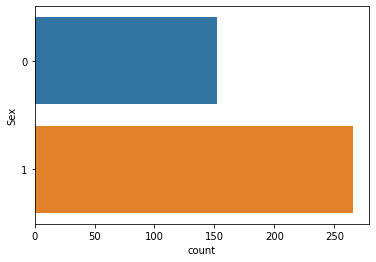

In [38]:
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0}).astype(int)
sns.countplot(y = 'Sex', data = test_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


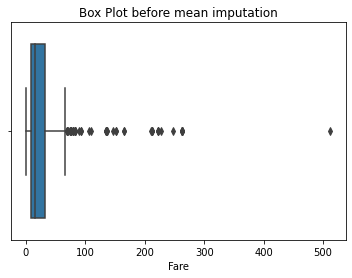

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


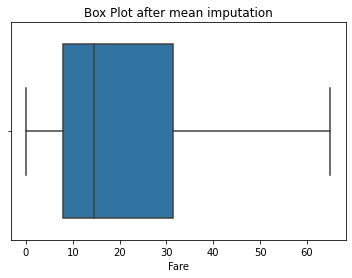

In [39]:
sns.boxplot(test_data['Fare'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = test_data['Fare'].quantile(0.25)
q3 = test_data['Fare'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(test_data['Fare'])
for i in test_data['Fare']:
    if i > Upper_tail or i < Lower_tail:
            test_data['Fare'] = test_data['Fare'].replace(i, m)
sns.boxplot(test_data['Fare'])
plt.title("Box Plot after mean imputation")
plt.show()   

In [40]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_ind
0,892,3,"Kelly, Mr. James",1,27.0,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,27.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",1,27.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,27.0,1,1,3101298,12.2875,S,0


In [41]:
# Removing the unnecessary Columns
test_data.drop('PassengerId', axis = 1, inplace = True)
test_data.drop('Name', axis = 1, inplace = True)
test_data.drop('Ticket', axis = 1, inplace = True)
test_data.drop('Embarked', axis = 1, inplace = True)
test_data.drop('Age', axis = 1, inplace = True)

# Preparing Data for Training

In [42]:
# separating the feature and target columns

X_train = train_data.drop('Survived', axis = 1)
y_train = train_data['Survived']


In [43]:
X_test = test_data

In [44]:
X_test.head(5)

,Pclass,Sex,SibSp,Parch,Fare,Cabin_ind
0,3,1,0,0,7.8292,0
1,3,0,1,0,7.0000,0
2,2,1,0,0,9.6875,0
3,3,1,0,0,8.6625,0
4,3,0,1,1,12.2875,0


In [45]:
X_train.head(5)

,Pclass,Sex,SibSp,Parch,Fare,Cabin_ind
0,3,1,1,0,7.250000,0
1,1,0,1,0,32.204208,1
2,3,0,0,0,7.925000,0
3,1,0,1,0,53.100000,1
4,3,1,0,0,8.050000,0


# First Model

In [46]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [47]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_train_acc = accuracy_score(y_train, logreg.predict(X_train))

print(f"Training accuracy of Logistic Regression Classifier is : {log_train_acc}")


Training accuracy of Logistic Regression Classifier is : 0.7912457912457912


In [48]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


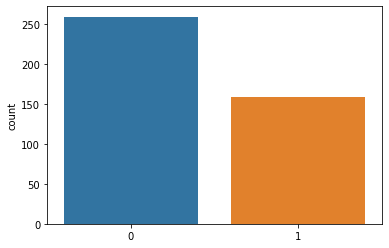

In [49]:
sns.countplot(y_pred)

# Checking for Multi-Collinearty using VIF

In [50]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [51]:
  vif_cal(input_data=train_data, dependent_col='Survived')

Pclass  VIF =  3.1
Sex  VIF =  1.09
SibSp  VIF =  1.44
Parch  VIF =  1.39
Fare  VIF =  2.53
Cabin_ind  VIF =  2.14


# Checking P-values

In [52]:
import statsmodels.api as sm 
Logit_model = sm.Logit(y_train,X_train)  
result = Logit_model.fit()
print(result.summary2()) # (p>|z| should be less than 0.1) ....(summary2 to use for summary for all data)

Optimization terminated successfully.
         Current function value: 0.459363
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.310     
Dependent Variable: Survived         AIC:              830.5843  
Date:               2022-08-16 20:29 BIC:              859.3383  
No. Observations:   891              Log-Likelihood:   -409.29   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      2.2474e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        0.0869    0.0606    1.4349  0.1513  -0.0318   0.2057
Sex          -2.6388    0.1888  -13.9789  0.0000  -3.0088  -2.

In [53]:
# Removing columns based on P-values
X_train.drop('Parch', axis = 1, inplace = True)
X_train.drop('Pclass', axis = 1, inplace = True)

In [54]:
X_test.drop('Parch', axis = 1, inplace = True)
X_test.drop('Pclass', axis = 1, inplace = True)

#Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [56]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_train_acc = accuracy_score(y_train, logreg.predict(X_train))

print(f"Training accuracy of Logistic Regression Classifier is : {log_train_acc}")


Training accuracy of Logistic Regression Classifier is : 0.792368125701459


In [57]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# Random Forest Classifier

In [58]:

from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 'sqrt',
                                  min_samples_leaf= 1, min_samples_split= 3, n_estimators= 60)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [59]:

# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")


Training accuracy of Random Forest is : 0.8215488215488216


In [60]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


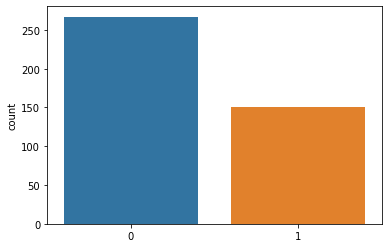

In [61]:
sns.countplot(y_pred)

# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_leaf_nodes = 6)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [63]:
  # accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")

Training accuracy of Decision Tree is : 0.8024691358024691


In [64]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


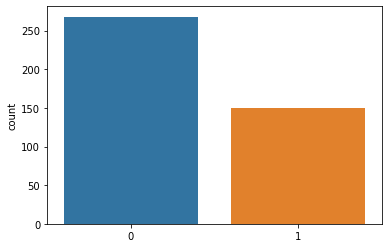

In [65]:
sns.countplot(y_pred)

# Gradient Boost Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, verbose=1) 
##fitting the gradient boost classifier
boost.fit(X_train,y_train)
y_pred = boost.predict(X_test)


      Iter       Train Loss   Remaining Time 
         1           1.2561            0.17s
         2           1.1954            0.29s
         3           1.1461            0.29s
         4           1.1055            0.27s
         5           1.0718            0.25s
         6           1.0436            0.23s
         7           1.0191            0.21s
         8           0.9970            0.20s
         9           0.9800            0.21s
        10           0.9637            0.21s
        20           0.8746            0.14s
        30           0.8351            0.11s
        40           0.8089            0.08s
        50           0.7911            0.07s
        60           0.7734            0.05s
        70           0.7575            0.04s
        80           0.7419            0.02s
        90           0.7305            0.01s
       100           0.7171            0.00s


In [68]:
###predicting Gradient boosting model on the train Data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
boost_predict_train=boost.predict(X_train)


boost_train_acc=f1_score(y_train, boost_predict_train, average='micro') 
print("train accuracy", boost_train_acc)

train accuracy 0.8496071829405163


In [69]:
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


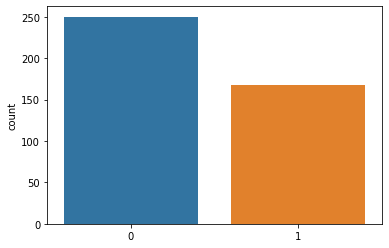

In [70]:
sns.countplot(y_pred)

# Model Comaprison

In [71]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier'],
    'Score' : [log_train_acc, rand_clf_train_acc, dtc_train_acc, boost_train_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,GradientBoostingClassifier,0.849607
1,RandomForestClassifier,0.821549
2,DecisionTreeClassifier,0.802469
0,LogisticRegression,0.792368
